# Plotting

In [81]:
import matplotlib.pyplot as plt
import numpy as np

## Terminology

Here's the basic terminology you will need to know (from the [documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html#sphx-glr-gallery-showcase-anatomy-py)):

![](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

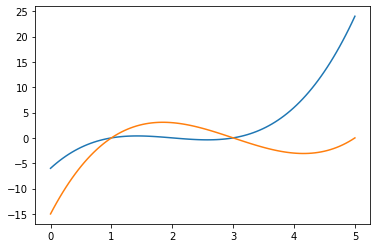

In [120]:
xs = np.linspace(0, 5, 100)
ys1 = (xs - 3) * (xs  - 2) * (xs - 1)
ys2 = (xs - 3) * (xs  - 1) * (xs - 5)
plt.plot(xs, ys1)
plt.plot(xs, ys2)

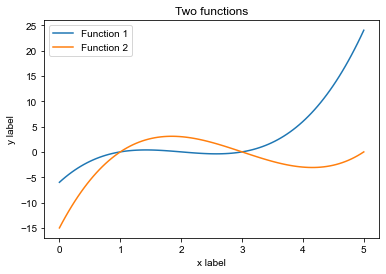

In [156]:
plt.plot(xs, ys1, label='Function 1')
plt.plot(xs, ys2, label='Function 2') 
plt.legend()
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Two functions');

## Basic formatting

Formatting, however, is a matter of taste. Here are some common quick fixes:

- **Despine**: remove the *spines* (lines showing the axes) that you don't need, usually at the right and top of the plot
- **Align the title** with the left axis, that usually results in a more consistent layout.
- **Hide legend frame**: a box around the legend is only needed when the legend overlaps with the plot, something you want to avoid anyway.

The guiding principle here is to make the figure as simple as possible. 
Every line increases the visual complexity of the figure, and can distract from what the reader should see in a figure. And so try get rid of everything you don't really need.

In [181]:
def title(text, ha='left', fontweight='bold', x=0, ax=None, **kwargs):
    if ax is None: ax = plt.gca()
    ax.set_title(text, x=x, ha=ha, fontweight=fontweight, **kwargs)

In [182]:
def despine(ax=None):
    if ax is None: ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

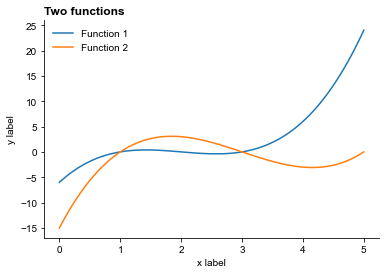

In [183]:
plt.plot(xs, ys1, label='Function 1')
plt.plot(xs, ys2, label='Function 2') 

plt.legend(frameon=False)
plt.xlabel('x label')
plt.ylabel('y label')
title('Two functions')
despine()

In sum, these are the functions that you want to know by heart:

- `plt.plot(xs, ys, label='my label')`: plot a line. The many possible arguments of this function are discussed below.
- `plt.legend()`: show the legend
- `plt.xlabel('x label')`: set the x label
- `plt.ylabel('y label')`: set the y label
- `plt.title('my title')`: set the title

## Formatting

Formatting plots usually involves several parameters: the color, line style, line width, markers, their size, and the opacity (alpha).

## Colors

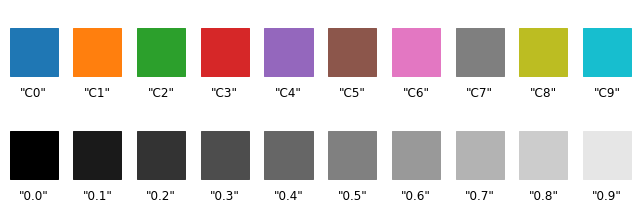

In [77]:
from matplotlib.patches import Rectangle

def show_colors(colors, axs):
    for color, ax in zip(colors, axs):
        rect = Rectangle((0, 0), 1, 1, color=color)
        ax.add_patch(rect)
        ax.text(0.5, -0.5, f'"{color}"', va='bottom', ha='center', fontsize=12)
        ax.axis('off')
        ax.axis('equal')
        
fig, axs = plt.subplots(2, 10, tight_layout=True, figsize=(9, 3))
show_colors([f'C{i}' for i in range(10)], axs[0, :])
show_colors([f'0.{i}' for i in range(10)], axs[1, :])

**Qualitative palettes.** 
First, You can cycle through the default colour cycle using `'C0', ..., 'C9'`. This is extremely useful for consistent color schemes. Just use this, all the time. Second, shades of gray are specied as *strings* of decimals between 0 (black) and 1 (white) `'0.1', ..., '0.99'`. Finally, `k` stands for black. There are other one-character color shorthands, but you can forget those and use `C0, ..., C9` instead. 

[> More ways to specify colors in matplotlib](https://matplotlib.org/stable/tutorials/colors/colors.html) <br/>
[> Choosing color palettes using seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)

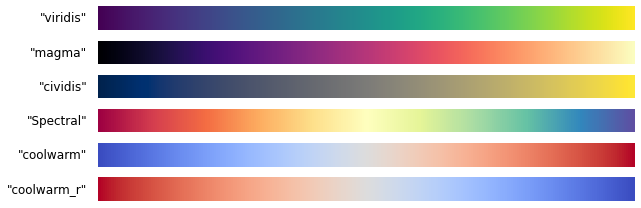

In [113]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradient(cmap, ax):
    ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(cmap))
    ax.text(-0.02, 0.5, f'"{cmap}"', va='center', ha='right', fontsize=12,
            transform=ax.transAxes)
    ax.set_axis_off()

cmaps = ['viridis', 'magma', 'cividis', 'Spectral', 'coolwarm', 'coolwarm_r']
fig, axs = plt.subplots(len(cmaps), figsize=(9, 3), tight_layout=True)
for cmap, ax in zip(cmaps, axs):
    plot_color_gradient(cmap, ax)

**Quantitative palettes.** When choosing colormaps, always use *perceptually uniform* colormaps such as `virids`, `magma`, or `cividis`. When the values you are plotting have an obvious center (e.g., 0) use a diverging color map such as `Spectral` or `coolwarm`. You can reverse a color map by adding the suffix `_r`

[> Read more about colormaps in the seaborn documentation](https://seaborn.pydata.org/tutorial/color_palettes.html)

#### Color (`color='some_color'` or `c='some_color'`)

1. **Pallette: `'C0', ..., 'C9'`.** These codes correspond to colors 0–9 in your color pallette. This is extremely useful for consistent color schemes. Just use this, all the time.
2. **Black: `'k'`.** There are other one-character color shorthands, but you can forget those and use `C0, ..., C9` instead.
3. **Grayscale: `'0.1', ..., '0.99'`.** Shades of gray are specied as *strings* of decimals between 0 (black) and 1 (white).

In [252]:
xs = np.linspace(0, 2, 30)
ys = np.sin(np.pi * xs)

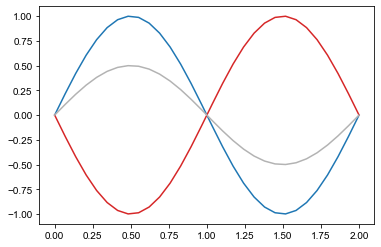

In [253]:
plt.plot(xs, ys)
plt.plot(xs, -1*ys, c='C3')
plt.plot(xs, ys/2, color='0.7')

#### Linestyle (`linestyle='style'` or `ls='style'`)

There are a few basic linestyles you'll need:

- Solid: `'solid'` or `'-'`
- Dashed: `'dashed'` or `'--'`
- Dotted: `'dotted'` or `':'`
- Dashdot: `'dashdot'` or `'-.'`

There are more linestyles:
[see this overview of all linestyles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).

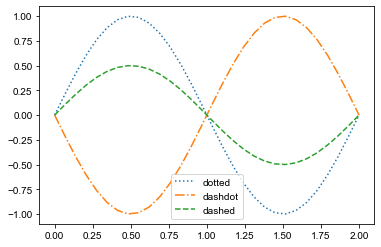

In [254]:
plt.plot(xs, ys, ls=':', label='dotted')
plt.plot(xs, -1*ys, ls='dashdot', label='dashdot')
plt.plot(xs, .5*ys, ls='dashed', label='dashed')
plt.legend()

#### Markers (`marker='marker symbol'` or `m='marker symbol'`)

- Circle: `'o'`
- Dot/point: `'.'`
- Cross: `'x'`
- Plus: `'+'`
- Diamond: `'d'`

[Here you can find a list of all markers](https://matplotlib.org/stable/api/markers_api.html).

#### Format strings

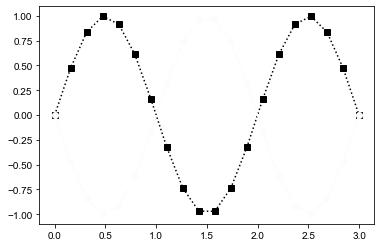

In [219]:
xs = np.linspace(0, 3, 20)
ys = np.sin(np.pi * xs)
plt.plot(xs, ys, ls='solid')
plt.plot(xs, -1*ys, '--o', c='0.99')

### Typography

In [65]:
import matplotlib

In [131]:
matplotlib.rcParams['font.family'] = 'Arial'
# matplotlib.rcParams['font.sans-serif'] = 'Helvetica Neue'

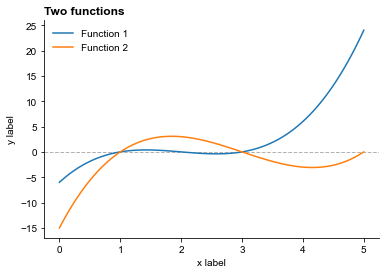

In [155]:
plt.plot(xs, ys1, label='Function 1')
plt.plot(xs, ys2, label='Function 2') 
plt.legend(frameon=False)
plt.xlabel('x label')
plt.ylabel('y label')
title('Two functions')
despine()

# Extra: a horizontal line through y=0
plt.axhline(0, 
            c='.7',     # or color='0.7'
            ls='--',    # or linestyle='--'
            lw=1,       # or linewidth=1
            zorder=-1)  # place behind the lines

## Figure layout

In [134]:
def cm2inch(*args):
    return list(map(lambda x: x/2.54, args))

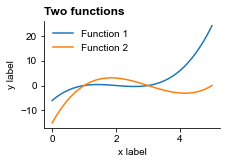

In [140]:
plt.figure(figsize=cm2inch(8, 5))
plt.plot(xs, ys1, label='Function 1')
plt.plot(xs, ys2, label='Function 2') 
plt.legend(frameon=False)
plt.xlabel('x label')
plt.ylabel('y label')
title('Two functions')
despine()
plt.savefig('test.pdf')

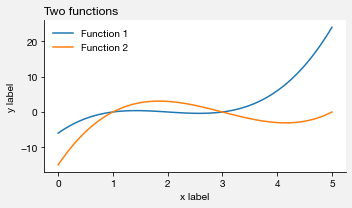

In [124]:
plt.figure(figsize=(5, 3), tight_layout=True, facecolor='.95')
plt.plot(xs, ys1, label='Function 1')
plt.plot(xs, ys2, label='Function 2') 
plt.legend(frameon=False)
plt.xlabel('x label')
plt.ylabel('y label')
title('Two functions')
despine()

In [116]:
from matplotlib.gridspec import GridSpec

In [118]:
# GridSpec?

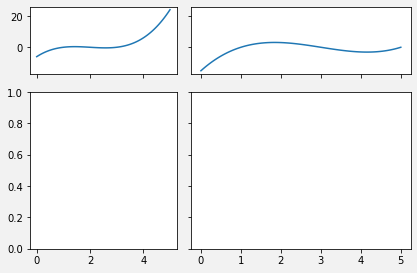

In [141]:
cm = 1/2.54
fig, axs = plt.subplots(2, 2, 
                        figsize=(15*cm, 10*cm), 
                        tight_layout=True,
                        gridspec_kw=dict(width_ratios=[.4, .6], height_ratios=[.3, .7]),
                        sharey='row', 
                        sharex='col', 
                        facecolor='.95')

axs[0, 0].plot(xs, ys1)
axs[0, 1].plot(xs, ys2)

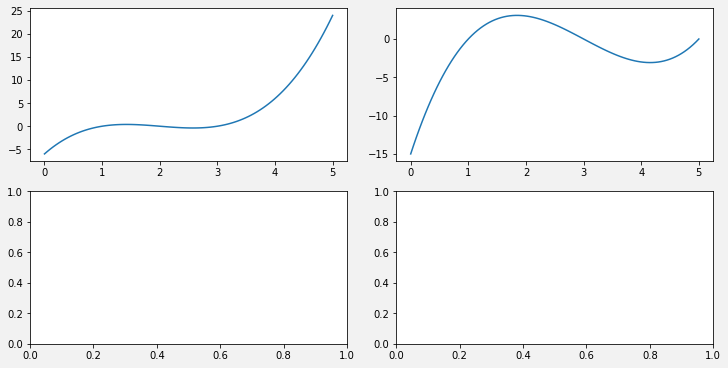

In [121]:
fig, axs = plt.subplots(2, 2, figsize=(10,5), constrained_layout=True, facecolor='.95')

axs[0, 0].plot(xs, ys1)
axs[0, 1].plot(xs, ys2)

## Extra

If your legend overlaps the figure, give the legend a semitransparent background. However, the border box is usually not needed. A quick fix is to use a white border: `plt.legend(edgecolor='w')`

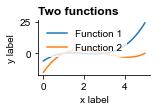

In [185]:
plt.figure(figsize=(2,1))
plt.plot(xs, ys1, label='Function 1')
plt.plot(xs, ys2, label='Function 2') 
plt.legend(edgecolor='w')
plt.xlabel('x label')
plt.ylabel('y label')
title('Two functions')
despine()